<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/basic_rnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement ***

*How* to build and use a recurrent neural network in Keras to write patent abstracts.

**LSTM cell is meant to do: allow past information to be reinjected at a later time.**

https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470

https://github.com/WillKoehrsen/recurrent-neural-networks

https://github.com/chentinghao/tinghao-tensorflow-rnn-tutorial/blob/master/mnist_rnn.ipynb

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# reset the graph and make sure the random numbers are always the same
def reset_graph(seed=2018):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

**We treat each image as a sequence of data, that is, the first row is the first step; second row is the second step and so on. Therefore, n_steps = number of rows and n_inputs = number of columns.**

The mnist dataset from TensorFlow assumes that you are using one-hot encoding, however, we are not going to do that. Therefore, we need to reshape the dataset from [num_data, 28*28] to [num_data, n_steps, n_inputs].

Since there are many outputs from the RNN, we only care about the last one. As a result, "state" in the code is considered as our output.

In [2]:
# reset
reset_graph()

# hyperparameters
n_neurons = 128
learning_rate = 0.0001
batch_size = 64
n_epochs = 20

# parameters
n_steps = 28 # 28 rows
n_inputs = 28 # 28 cols
n_outputs = 10 # 10 classes

# build a rnn model
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

logits = tf.layers.dense(state, n_outputs)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.


In [4]:
# input data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

X_test = mnist.test.images # X_test shape: [num_test, 28*28]
X_test = X_test.reshape([-1, n_steps, n_inputs])
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# initialize the variables
init = tf.global_variables_initializer()

# train the model
sess = tf.Session()
sess.run(init)
n_batches = mnist.train.num_examples // batch_size
loss_list = []
acc_list = []
for epoch in range(n_epochs):
    for batch in range(n_batches):
        X_train, y_train = mnist.train.next_batch(batch_size)
        X_train = X_train.reshape([-1, n_steps, n_inputs])
        sess.run(optimizer, feed_dict={X: X_train, y: y_train})
    loss_train, acc_train = sess.run(
        [loss, accuracy], feed_dict={X: X_train, y: y_train})
    loss_list.append(loss_train)
    acc_list.append(acc_train)
    print('Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}'.format(
        epoch + 1, loss_train, acc_train))
loss_test, acc_test = sess.run(
    [loss, accuracy], feed_dict={X: X_test, y: y_test})
print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))

Epoch: 1, Train Loss: 0.433, Train Acc: 0.844
Epoch: 2, Train Loss: 0.351, Train Acc: 0.906
Epoch: 3, Train Loss: 0.296, Train Acc: 0.938
Epoch: 4, Train Loss: 0.261, Train Acc: 0.938
Epoch: 5, Train Loss: 0.229, Train Acc: 0.906
Epoch: 6, Train Loss: 0.087, Train Acc: 0.969
Epoch: 7, Train Loss: 0.263, Train Acc: 0.891
Epoch: 8, Train Loss: 0.156, Train Acc: 0.953
Epoch: 9, Train Loss: 0.337, Train Acc: 0.906
Epoch: 10, Train Loss: 0.043, Train Acc: 1.000
Epoch: 11, Train Loss: 0.220, Train Acc: 0.938
Epoch: 12, Train Loss: 0.095, Train Acc: 0.984
Epoch: 13, Train Loss: 0.227, Train Acc: 0.969
Epoch: 14, Train Loss: 0.117, Train Acc: 0.969
Epoch: 15, Train Loss: 0.157, Train Acc: 0.938
Epoch: 16, Train Loss: 0.015, Train Acc: 1.000
Epoch: 17, Train Loss: 0.024, Train Acc: 1.000
Epoch: 18, Train Loss: 0.045, Train Acc: 0.984
Epoch: 19, Train Loss: 0.065, Train Acc: 0.953
Epoch: 20, Train Loss: 0.213, Train Acc: 0.953
Test Loss: 0.129, Test Acc: 0.962


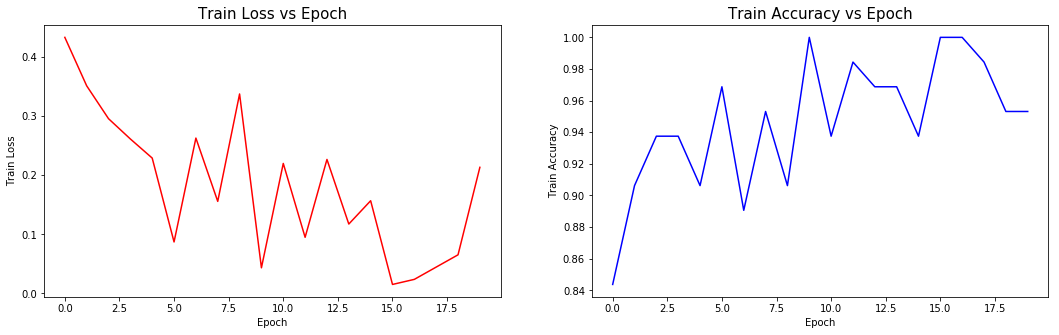

In [6]:
# plot train loss vs epoch
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Train Loss vs Epoch', fontsize=15)
plt.plot(np.arange(n_epochs), loss_list, 'r-')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')

# plot train accuracy vs epoch
plt.subplot(1, 2, 2)
plt.title('Train Accuracy vs Epoch', fontsize=15)
plt.plot(np.arange(n_epochs), acc_list, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.show()


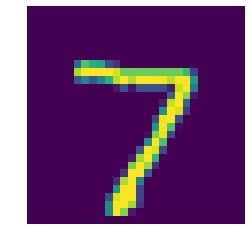

predict:  7


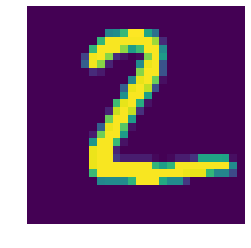

predict:  2


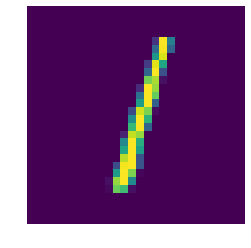

predict:  1


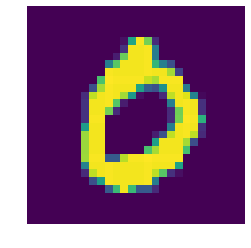

predict:  0


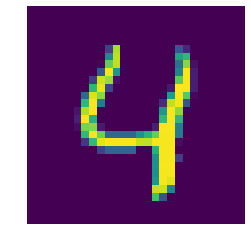

predict:  4


In [7]:
n_predict = 5 # number to display prediction

for i in range(n_predict):
    pred = sess.run(tf.argmax(logits[i]), feed_dict={X: X_test, y: y_test})
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.show()
    print('predict: ', pred)